# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [7]:
# import all files
files_all = glob.glob('states*.csv')
# read all csv and store all info in a single df
df_list = []
for file in files_all:
    df_x = pd.read_csv(file)
    df_list.append(df_x)

df = pd.concat(df_list)
# check out data
print(df.head())

   Unnamed: 0     State  TotalPop Hispanic   White   Black Native   Asian  \
0           0   Georgia  10006693    8.42%  54.29%  32.09%  0.19%   3.10%   
1           1    Hawaii   1406299    9.19%  25.03%   2.05%  0.14%  36.59%   
2           2     Idaho   1616547   11.51%  83.14%   0.57%  1.47%   1.14%   
3           3  Illinois  12873761   15.60%  60.86%  17.11%  0.12%   4.48%   
4           4   Indiana   6568645    6.54%  78.43%  11.19%  0.19%   1.58%   

  Pacific       Income          GenderPop  
0   0.05%  $50,811.08   4883331M_5123362F  
1   8.76%  $73,264.43     709871M_696428F  
2   0.13%  $48,017.32     810464M_806083F  
3   0.02%  $59,587.05   6316899M_6556862F  
4   0.03%  $48,616.23   3235263M_3333382F  


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [9]:
# inspect df
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [11]:
# convert all percentage data to num 
# convert income data to num
# further split GerderPop into Gender_M, Gender_F, and get the values to be int

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [14]:
income_clean = df.Income.str.replace(r"\$|,", '', regex=True)
income_clean = income_clean.str.strip()
df['Income'] = pd.to_numeric(income_clean)
print(df.Income.head())

0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
Name: Income, dtype: float64


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [16]:
gender_pop_split = df.GenderPop.str.split(r'(\d+)', expand=True)
print(gender_pop_split.head())

  0        1   2        3  4
0    4883331  M_  5123362  F
1     709871  M_   696428  F
2     810464  M_   806083  F
3    6316899  M_  6556862  F
4    3235263  M_  3333382  F


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [18]:
df['Men'] = pd.to_numeric(gender_pop_split[1])
df['Women'] = pd.to_numeric(gender_pop_split[3])
print(df.head())
print(df.dtypes)

   Unnamed: 0     State  TotalPop Hispanic   White   Black Native   Asian  \
0           0   Georgia  10006693    8.42%  54.29%  32.09%  0.19%   3.10%   
1           1    Hawaii   1406299    9.19%  25.03%   2.05%  0.14%  36.59%   
2           2     Idaho   1616547   11.51%  83.14%   0.57%  1.47%   1.14%   
3           3  Illinois  12873761   15.60%  60.86%  17.11%  0.12%   4.48%   
4           4   Indiana   6568645    6.54%  78.43%  11.19%  0.19%   1.58%   

  Pacific    Income          GenderPop      Men      Women  
0   0.05%  50811.08  4883331M_5123362F  4883331  5123362.0  
1   8.76%  73264.43    709871M_696428F   709871   696428.0  
2   0.13%  48017.32    810464M_806083F   810464   806083.0  
3   0.02%  59587.05  6316899M_6556862F  6316899  6556862.0  
4   0.03%  48616.23  3235263M_3333382F  3235263  3333382.0  
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          ob

In [19]:
# df['Women'] = df['Women'].astype('int64')
# print(df.dtypes)
# there are missing values in Women column

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

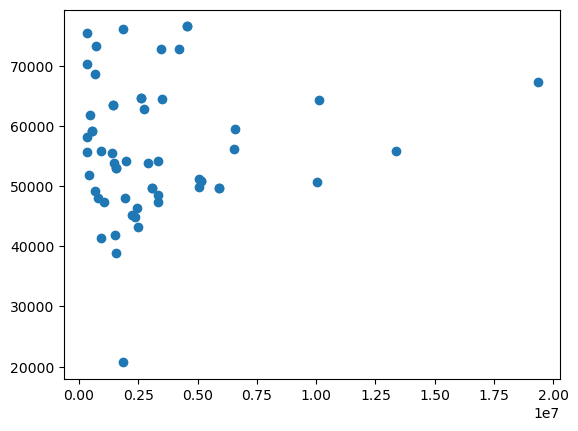

In [21]:
# compare women poppulation(abs valre) vs income
plt.scatter(df.Women, df.Income)
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [23]:
# check if there are missing in any column
print(df.isna().sum())

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
Men           0
Women         3
dtype: int64


In [24]:
# check nan value women rows
print(df[df['Women'].isna()])

   Unnamed: 0     State  TotalPop Hispanic   White   Black Native  Asian  \
1           1   Montana   1014699    3.27%  86.42%   0.43%  7.06%  0.57%   
5           5  Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   
0           0  Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   

  Pacific    Income   GenderPop      Men  Women  
1   0.07%  47645.68   510163M_F   510163    NaN  
5   0.04%  78765.40  2872643M_F  2872643    NaN  
0   0.04%  78765.40  2872643M_F  2872643    NaN  


In [25]:
# check all rows with non value
print(df[df.isna().any(axis=1)])

   Unnamed: 0         State  TotalPop Hispanic   White   Black Native  Asian  \
1           1       Montana   1014699    3.27%  86.42%   0.43%  7.06%  0.57%   
1           1        Kansas   2892987   11.64%  75.96%   6.57%  0.73%  2.33%   
5           5      Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   
5           5      Colorado   5278906   20.78%  69.90%   3.55%  0.57%  2.66%   
0           0      Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   
4           4  North Dakota    721640    2.83%  87.45%   1.28%  5.65%  0.96%   
0           0      Colorado   5278906   20.78%  69.90%   3.55%  0.57%  2.66%   
2           2      Delaware    926454    8.82%  64.63%  20.74%  0.26%  3.27%   

  Pacific    Income          GenderPop      Men      Women  
1   0.07%  47645.68          510163M_F   510163        NaN  
1     NaN  53885.61  1439862M_1453125F  1439862  1453125.0  
5   0.04%  78765.40         2872643M_F  2872643        NaN  
5     NaN  64657.80  2648667M_26302

In [26]:
# fill nan women 
df = df.fillna(value = {'Women': df['TotalPop'] - df['Men']})
print(df.Women)

0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
Name: Women, dtype: float64


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [28]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Unnamed: 0, State, TotalPop, Hispanic, White, Black, Native, Asian, Pacific, Income, GenderPop, Men, Women]
Index: []


11. Drop those duplicates using the `.drop_duplicates()` function.

In [30]:
# no duplicated rows to drop

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

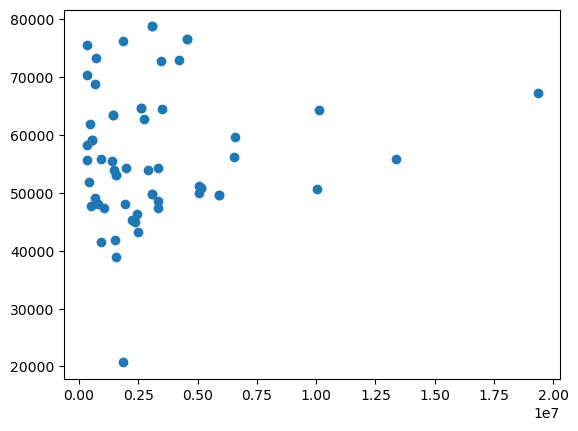

In [32]:
plt.scatter(df.Women, df.Income)
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [35]:
# print columns
print(df.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


In [36]:
# convert percentage to num
# Pacific has non value, so first do nothing to this column
# convert 'Hispanic', 'White', 'Black',
       # 'Native', 'Asian', to num

In [37]:
df['Hispanic'] = df['Hispanic'].str.replace('%', '').astype('float')/100
df['White'] = df['White'].str.replace('%', '').astype('float')/100
df['Black'] = df['Black'].str.replace('%', '').astype('float')/100
df['Native'] = df['Native'].str.replace('%', '').astype('float')/100
df['Asian'] = df['Asian'].str.replace('%', '').astype('float')/100
print(df.head())
print(df.dtypes)

   Unnamed: 0     State  TotalPop  Hispanic   White   Black  Native   Asian  \
0           0   Georgia  10006693    0.0842  0.5429  0.3209  0.0019  0.0310   
1           1    Hawaii   1406299    0.0919  0.2503  0.0205  0.0014  0.3659   
2           2     Idaho   1616547    0.1151  0.8314  0.0057  0.0147  0.0114   
3           3  Illinois  12873761    0.1560  0.6086  0.1711  0.0012  0.0448   
4           4   Indiana   6568645    0.0654  0.7843  0.1119  0.0019  0.0158   

  Pacific    Income          GenderPop      Men      Women  
0   0.05%  50811.08  4883331M_5123362F  4883331  5123362.0  
1   8.76%  73264.43    709871M_696428F   709871   696428.0  
2   0.13%  48017.32    810464M_806083F   810464   806083.0  
3   0.02%  59587.05  6316899M_6556862F  6316899  6556862.0  
4   0.03%  48616.23  3235263M_3333382F  3235263  3333382.0  
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian

In [65]:
print(df)

   Unnamed: 0                 State  TotalPop  Hispanic   White   Black  \
0           0               Georgia  10006693    0.0842  0.5429  0.3209   
1           1                Hawaii   1406299    0.0919  0.2503  0.0205   
2           2                 Idaho   1616547    0.1151  0.8314  0.0057   
3           3              Illinois  12873761    0.1560  0.6086  0.1711   
4           4               Indiana   6568645    0.0654  0.7843  0.1119   
5           5                  Iowa   3093526    0.0530  0.8772  0.0326   
0           0                  Utah   2903379    0.1347  0.7941  0.0102   
1           1               Vermont    626604    0.0161  0.9398  0.0098   
2           2              Virginia   8256630    0.0801  0.6327  0.2018   
3           3            Washington   6985464    0.1114  0.7204  0.0338   
4           4         West Virginia   1851420    0.0129  0.9218  0.0366   
5           5             Wisconsin   5742117    0.0668  0.7986  0.0820   
0           0            

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.